In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")

In [21]:
data_dict = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv")

In [22]:
data_dict.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [23]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
# checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [25]:
# selecting data for training
X = df.drop('country', axis = 1)

In [26]:
from sklearn import cluster, metrics
# Fit K-Means Clustering
km=cluster.KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
df['classes'] = km.labels_

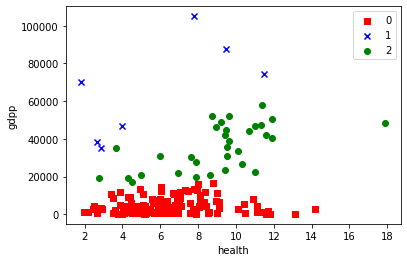

In [28]:
# Plot of three clusters
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(df.classes.values), colors, markers):
    plt.scatter(df[df.classes == l]['health'], 
                df[df.classes == l]['gdpp'], 
                c=c, label=l, marker=m)
    plt.xlabel('health')
    plt.ylabel('gdpp')
    plt.legend()
plt.show()

In [29]:
# table 1.1
df.groupby('classes').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
classes,,,,,,,,,
0,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000


In [30]:
# as per above table we can give names for classes as follows:
names_classes  = {
    0: "under-developing country",
    1: "developing country",
    2: "developed country"
}

In [31]:
# replacing classes names using above dict
for i in names_classes.keys():
    df['classes'] = df['classes'].replace(i, names_classes[i])

In [32]:
# checking the classes counts
df.classes.value_counts()

under-developing country    128
developed country            32
developing country            7
Name: classes, dtype: int64

In [33]:
# list of countries with classes first 10 records
df[['country', 'classes']].head()

,country,classes
0,Afghanistan,under-developing country
1,Albania,under-developing country
2,Algeria,under-developing country
3,Angola,under-developing country
4,Antigua and Barbuda,under-developing country


In [34]:
# according to groupby table 1.1 we can see that all the columns like higher child mortality rate, gdpp, income are higher for 0th class.
# based on this we can easily say that 0 class countrues are under-developing countries and 1st classes belongs to developed natoions